In [63]:
from importlib import reload
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Add the project root to the path
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, project_root)

import pacing_auction.data as data
import pacing_auction.auction as auction
import pacing_auction.elimination as elimination
import pacing_auction.generator as generator
reload(data)
reload(elimination)
reload(auction)
reload(generator)

sns.set_theme("paper")

In [ ]:
df1 = pd.read_csv("../results/v2.1/data.csv")
df2 = pd.read_csv("../results/v2.2/data.csv")
df = pd.concat([df1, df2])

df.to_csv("../data.csv", index=False)


In [32]:
df['time_per_iteration'] = df['runtime'] / df['iterations']
df

,runtime,iterations,result_type,timeout,error,cycle_length,max_social_welfare,max_liquid_welfare,max_revenue,min_social_welfare,min_liquid_welfare,min_revenue,n,m,generator,elim_strategy,sigma,delta,time_per_iteration
0,0.160158,238,Cycle,False,False,237,1.181865,1.005322,1.005322,1.181482,0.281271,0.281271,2,2,correlated,subsequent,0.05,0.75,0.000673
1,0.001909,2,PNE,False,False,0,0.019234,0.017668,0.017668,0.019234,0.017668,0.017668,2,2,correlated,subsequent,0.05,0.75,0.000954
2,0.126640,157,Cycle,False,False,156,1.224163,1.116186,1.116186,0.276460,0.155985,0.155985,2,2,correlated,subsequent,0.05,0.75,0.000807
3,0.001700,2,PNE,False,False,0,1.561505,0.687222,0.687222,1.561505,0.687222,0.687222,2,2,correlated,subsequent,0.05,0.75,0.000850
4,0.002175,3,Cycle,False,False,2,0.998997,0.517398,0.517398,0.997993,0.515320,0.515320,2,2,correlated,subsequent,0.05,0.75,0.000725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,10.703271,159,Cycle,False,False,24,4.385116,4.306803,4.306803,3.919611,3.606745,3.606745,10,7,correlated,subsequent,0.10,0.00,0.067316
7286,1027.517904,14282,Cycle,False,False,85,4.574554,4.321255,4.321255,3.885079,3.303489,3.303489,10,7,correlated,subsequent,0.10,0.00,0.071945
7287,5.252200,75,Cycle,False,False,47,3.978297,3.916662,3.916662,3.664039,3.484369,3.484369,10,7,correlated,subsequent,0.10,0.00,0.070029
7288,4576.007427,119847,Cycle,False,False,119685,4.164776,3.797924,3.797924,3.453869,2.920684,2.920684,10,7,correlated,subsequent,0.10,0.00,0.038182


In [33]:
print(f"Timeouts: {df[df["timeout"]].shape[0]}")
print(f"Errors: {df[df["error"]].shape[0]}")

Timeouts: 0
Errors: 0


In [34]:
complete = df[df["generator"] == "complete"]
sampled = df[df["generator"] == "sampled"]
correlated = df[df["generator"] == "correlated"]

elim_all = df[df["elim_strategy"] == "all"]
elim_subsequent = df[df["elim_strategy"] == "subsequent"]
elim_current = df[df["elim_strategy"] == "current"]

print(complete.shape)
print(sampled.shape)
print(correlated.shape)

print(elim_all.shape)
print(elim_subsequent.shape)
print(elim_current.shape)

(810, 19)
(810, 19)
(12960, 19)
(0, 19)
(14580, 19)
(0, 19)


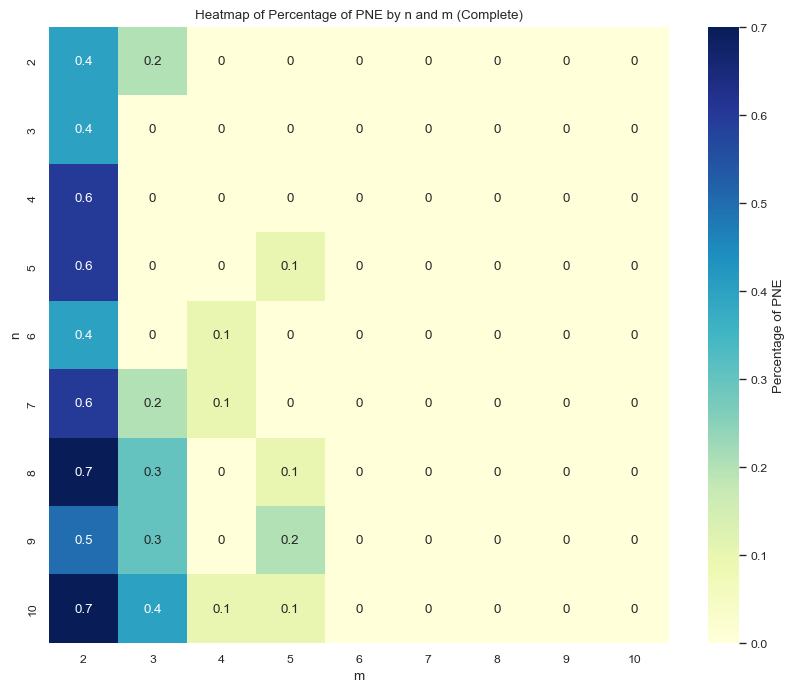

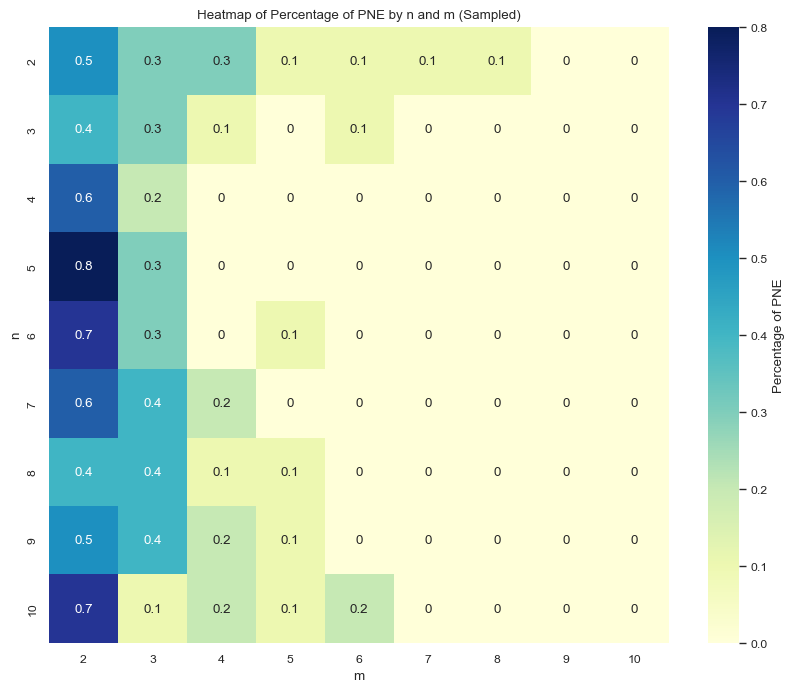

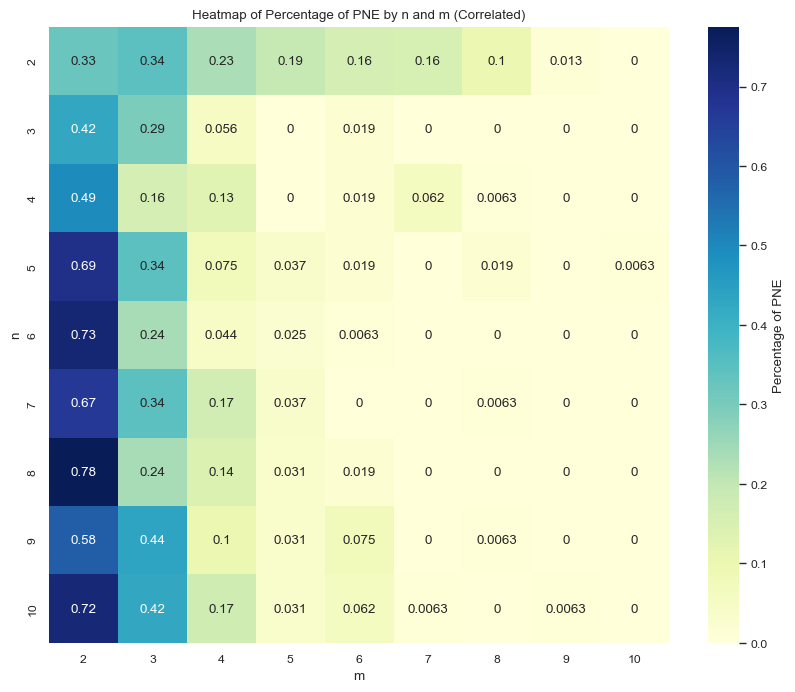

In [35]:
complete_pivot = complete.pivot_table(
    index='n', columns='m', values='result_type', aggfunc=lambda x: (x == 'PNE').mean()
)
sampled_pivot = sampled.pivot_table(
    index='n', columns='m', values='result_type', aggfunc=lambda x: (x == 'PNE').mean()
)
correlated_pivot = correlated.pivot_table(
    index='n', columns='m', values='result_type', aggfunc=lambda x: (x == 'PNE').mean()
)

# Generate the heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(complete_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage of PNE'})
plt.title('Heatmap of Percentage of PNE by n and m (Complete)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(sampled_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage of PNE'})
plt.title('Heatmap of Percentage of PNE by n and m (Sampled)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlated_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage of PNE'})
plt.title('Heatmap of Percentage of PNE by n and m (Correlated)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

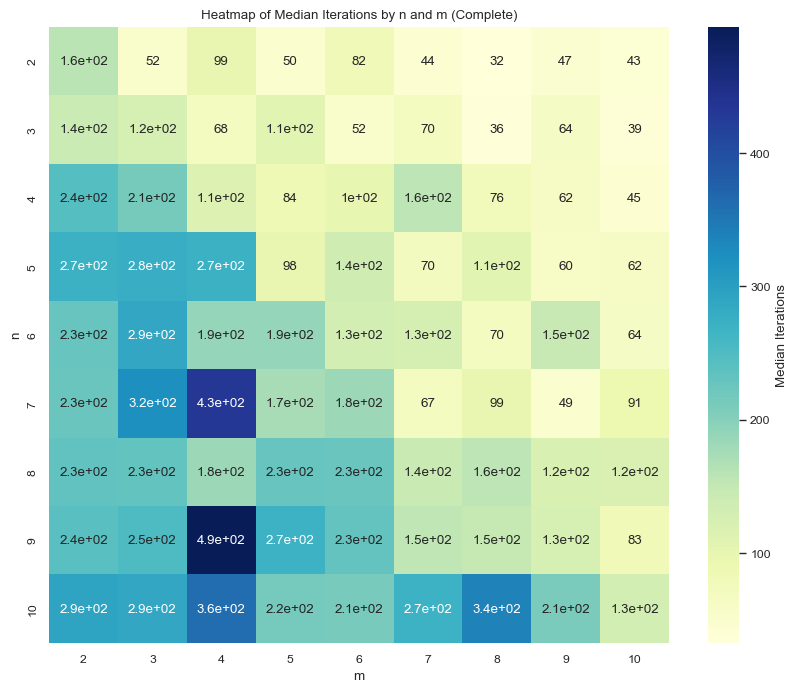

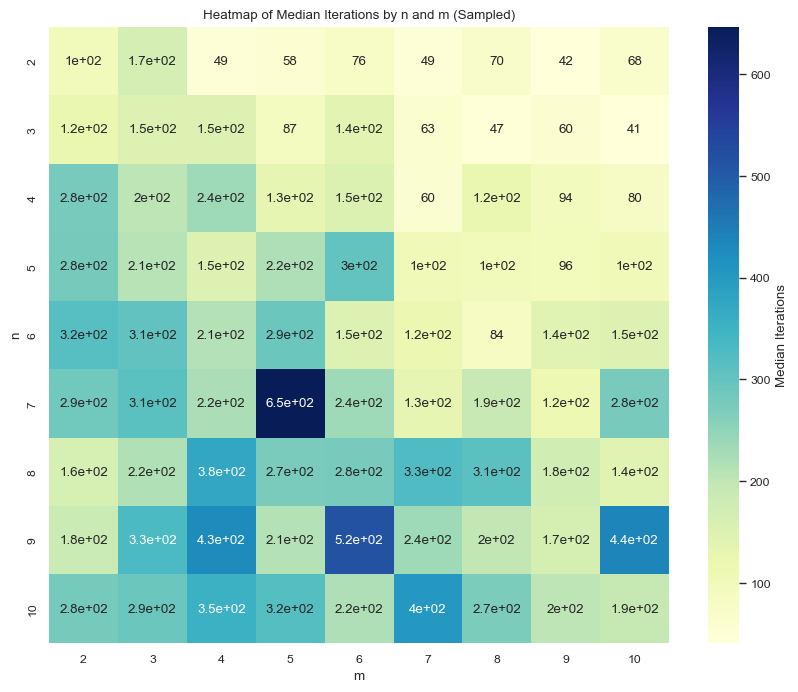

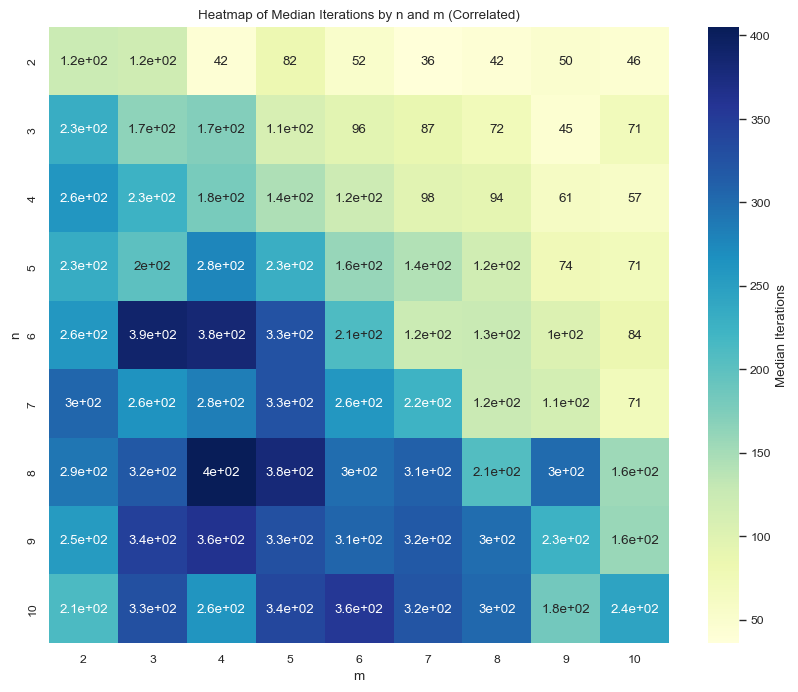

In [36]:
# Create pivot tables for the number of iterations
complete_iterations_pivot = complete.pivot_table(
    index='n', columns='m', values='iterations', aggfunc='median'
)
sampled_iterations_pivot = sampled.pivot_table(
    index='n', columns='m', values='iterations', aggfunc='median'
)
correlated_iterations_pivot = correlated.pivot_table(
    index='n', columns='m', values='iterations', aggfunc='median'
)

# Generate the heatmaps for iterations
plt.figure(figsize=(10, 8))
sns.heatmap(complete_iterations_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Median Iterations'})
plt.title('Heatmap of Median Iterations by n and m (Complete)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(sampled_iterations_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Median Iterations'})
plt.title('Heatmap of Median Iterations by n and m (Sampled)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlated_iterations_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Median Iterations'})
plt.title('Heatmap of Median Iterations by n and m (Correlated)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()


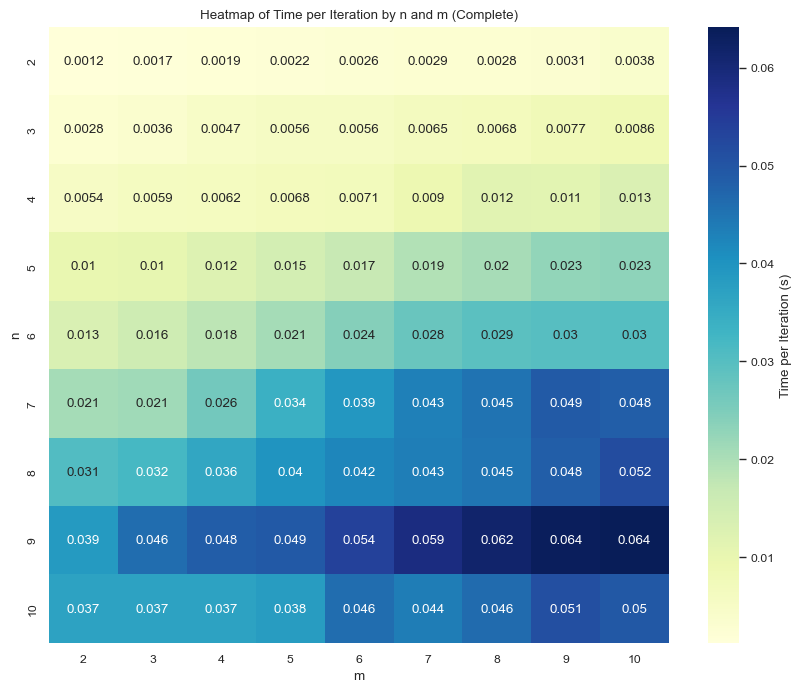

In [37]:
df_time_per_iteration_pivot = df.pivot_table(
    index='n', columns='m', values='time_per_iteration', aggfunc='median'
)

plt.figure(figsize=(10, 8))
sns.heatmap(df_time_per_iteration_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Time per Iteration (s)'})
plt.title('Heatmap of Time per Iteration by n and m (Complete)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

In [51]:
pnes = df[df['result_type'] == 'PNE']
cycles = df[df['result_type'] == 'Cycle']
print(f"PNEs: {pnes.shape[0]}, {round(pnes.shape[0] * 100 / df.shape[0], 2)}%")

# plt.figure()
# sns.histplot(pnes[pnes['iterations'] > 3]['iterations'], bins=100, kde=True) # type: ignore

# plt.figure()
# sns.histplot(cycles[cycles["iterations"] < 1000]['iterations'], bins=100, kde=True) # type: ignore



PNEs: 1856, 12.73%


In [39]:
pnes_complete = pnes[pnes['generator'] == 'complete']
cycles_complete = cycles[cycles['generator'] == 'complete']
print(f"PNEs (Complete): {pnes_complete.shape[0]}, {round(pnes_complete.shape[0] * 100 / complete.shape[0], 2)}%")

# plt.figure()
# sns.histplot(pnes_complete[pnes_complete['iterations'] > 3]['iterations'], bins=100, kde=True) # type: ignore

# plt.figure()
# sns.histplot(cycles_complete[cycles_complete["iterations"] < 1000]['iterations'], bins=100, kde=True) # type: ignore

PNEs (Complete): 71, 8.77%


In [40]:
pnes_sampled = pnes[pnes['generator'] == 'sampled']
cycles_sampled = cycles[cycles['generator'] == 'sampled']
print(f"PNEs (Sampled): {pnes_sampled.shape[0]}, {round(pnes_sampled.shape[0] * 100 / sampled.shape[0], 2)}%")

# plt.figure()
# sns.histplot(pnes_sampled[pnes_sampled['iterations'] > 3]['iterations'], bins=100, kde=True) # type: ignore

# plt.figure()
# sns.histplot(cycles_sampled[cycles_sampled["iterations"] < 1000]['iterations'], bins=100, kde=True) # type: ignore

PNEs (Sampled): 101, 12.47%


PNEs (Correlated): 1684, 12.99%


<Axes: xlabel='iterations', ylabel='Count'>

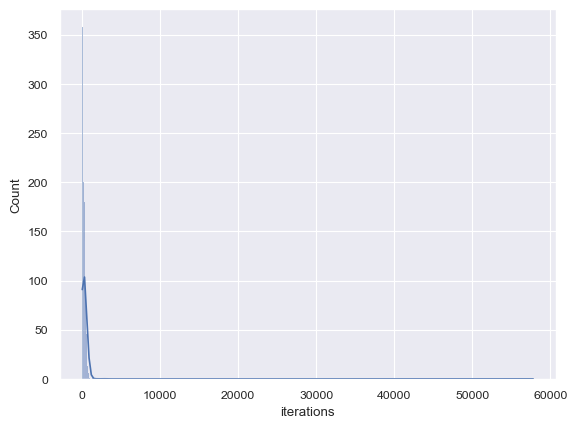

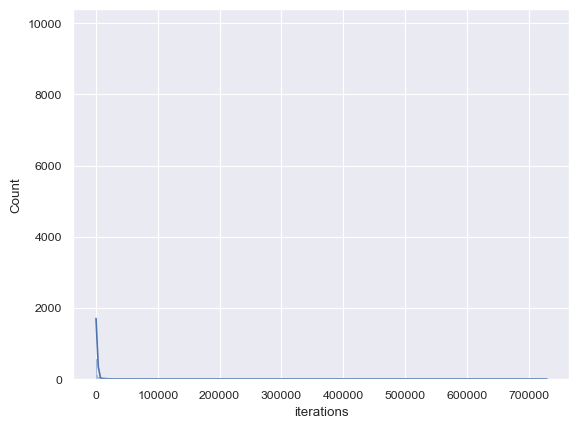

In [61]:
pnes_correlated = pnes[pnes['generator'] == 'correlated']
cycles_correlated = cycles[cycles['generator'] == 'correlated']
print(f"PNEs (Correlated): {pnes_correlated.shape[0]}, {round(pnes_correlated.shape[0] * 100 / correlated.shape[0], 2)}%")

plt.figure()
sns.histplot(pnes_correlated['iterations'], bins=1000, kde=True) # type: ignore

plt.figure()
sns.histplot(cycles_correlated['iterations'], bins=1000, kde=True) # type: ignore

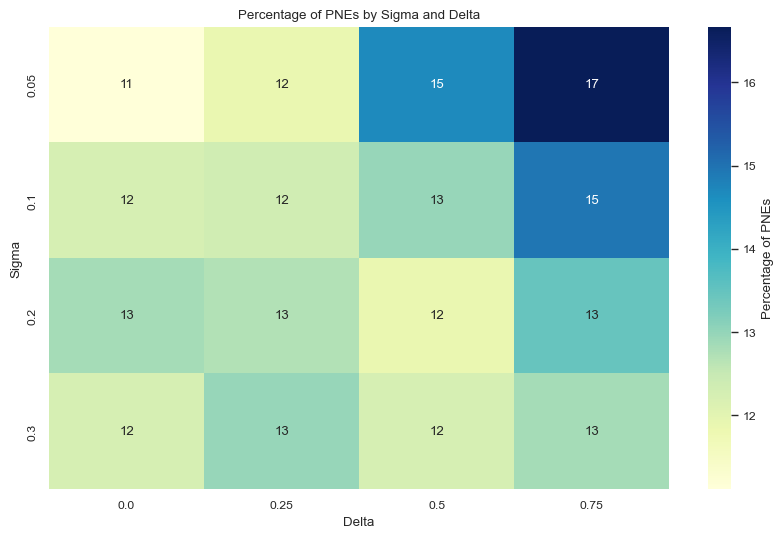

In [62]:
# Calculate percentage of PNEs for each sigma-delta combination
sigma_delta_pne = []
for (sigma, delta), df_group in correlated.groupby(["sigma", "delta"]): # type: ignore
    pnes_group = df_group[df_group['result_type'] == 'PNE']
    pne_percentage = (pnes_group.shape[0] / df_group.shape[0]) * 100
    sigma_delta_pne.append({'sigma': sigma, 'delta': delta, 'pne_percentage': pne_percentage})

# Convert to DataFrame
df_sigma_delta = pd.DataFrame(sigma_delta_pne)

# Create pivot table for heatmap
pivot_table = df_sigma_delta.pivot_table(
    index='sigma',
    columns='delta',
    values='pne_percentage'
)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage of PNEs'})
plt.title('Percentage of PNEs by Sigma and Delta')
plt.xlabel('Delta')
plt.ylabel('Sigma')
plt.show()


In [49]:
display(pnes.describe())
display(cycles.describe())

,runtime,iterations,cycle_length,max_social_welfare,max_liquid_welfare,max_revenue,min_social_welfare,min_liquid_welfare,min_revenue,n,m,sigma,delta,time_per_iteration
count,1856.000000,1856.000000,1856.0,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1684.000000,1684.000000,1856.000000
mean,5.814529,254.859914,0.0,2.037245,1.452337,1.452337,1.399152,0.893390,0.893390,6.175108,2.920797,0.159739,0.393260,0.019224
std,25.546604,1349.904490,0.0,0.974664,0.829743,0.829743,0.875389,0.716905,0.716905,2.686904,1.343319,0.095937,0.281512,0.016065
min,0.001053,2.000000,0.0,0.019234,0.017668,0.017668,0.002405,0.002405,0.002405,2.000000,2.000000,0.050000,0.000000,0.000527
25%,0.491298,85.000000,0.0,1.399491,0.886002,0.886002,0.855549,0.412417,0.412417,4.000000,2.000000,0.050000,0.250000,0.003907
50%,3.192222,199.000000,0.0,1.860409,1.320519,1.320519,1.218734,0.750184,0.750184,6.000000,2.000000,0.100000,0.500000,0.016556
75%,7.863884,323.250000,0.0,2.559858,1.844630,1.844630,1.831504,1.135192,1.135192,9.000000,3.000000,0.200000,0.750000,0.029929
max,1056.476382,57784.000000,0.0,7.038956,7.022393,7.022393,5.978289,5.229414,5.229414,10.000000,10.000000,0.300000,0.750000,0.075548


,runtime,iterations,cycle_length,max_social_welfare,max_liquid_welfare,max_revenue,min_social_welfare,min_liquid_welfare,min_revenue,n,m,sigma,delta,time_per_iteration
count,12724.000000,12724.000000,12724.000000,12724.000000,12724.000000,12724.000000,12724.000000,12724.000000,12724.000000,12724.000000,12724.000000,11276.000000,11276.000000,12724.000000
mean,32.771668,985.089987,508.471550,4.574710,3.855767,3.855767,3.580997,2.438088,2.438088,5.974458,6.449151,0.162912,0.372273,0.027047
std,286.427513,10917.688103,10500.018023,1.892506,1.938306,1.938306,1.699927,1.493512,1.493512,2.565540,2.406600,0.096028,0.279131,0.020242
min,0.002175,3.000000,2.000000,0.009020,0.009020,0.009020,0.007048,0.007048,0.007048,2.000000,2.000000,0.050000,0.000000,0.000640
25%,0.795599,73.000000,35.000000,3.069479,2.290851,2.290851,2.210658,1.246244,1.246244,4.000000,4.000000,0.100000,0.000000,0.007863
50%,3.457399,166.000000,82.000000,4.538214,3.661641,3.661641,3.505609,2.202465,2.202465,6.000000,7.000000,0.200000,0.250000,0.023671
75%,11.420774,358.000000,172.000000,5.928670,5.248285,5.248285,4.785835,3.421507,3.421507,8.000000,9.000000,0.300000,0.500000,0.042767
max,14753.941546,729302.000000,725928.000000,9.963362,9.943374,9.943374,9.546757,8.009465,8.009465,10.000000,10.000000,0.300000,0.750000,0.089878
